## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Movie Analysis for Movie Production

## Overview

This project analyzes movie characteristics such as genres, return on investment (ROI), and ratings. The data analysis performed in this repository is based on datasets from [Box Office Mojo](https://www.boxofficemojo.com/), [IMDB](https://www.imdb.com/), [Rotten Tomatoes](https://www.rottentomatoes.com/), [TheMovieDB](https://www.themoviedb.org/), and [The Numbers](https://www.the-numbers.com/).  

## Buisness Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

> ### Buisness Understanding 
> Microsoft wants to enter the movie production business however as a rookie in this business they need insight on audience opinions about characteristics about movies. Audience opinions impact ROI. In addition to learning about what an audience enjoys, Microsoft must also consider when to release their movies to get the most ROI. 

## Data Understanding

In [58]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import requests
import json 
import zipfile
import key 
import calendar 
import ast

### Box Office Mojo
The dataset in correspondance to the Box Office Mojo in the zipped Data folder is titled "*bom.movie_gross.csv.gz*". To explore this files contents Pandas can be used for exploratory analysis. The columns of interest in this file are 'domestic_gross', 'foreign_gross' and 'year'

In [59]:
# Read the file
bom_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### IMDB 
The dataset in correspondance to IMDB in the zipped Data folder is a database titled "*im.db.zip*". To deal with this dataset SQLite3 in addtion to Pandas must be used for exploratory analysis. The main tables of interest in this database are the movie_basics and movie_ratings tables. These tables contain movie charactertics and measureables for analysis. The other tables include information about the cast, writers, and directors for the movies. The below diagram shows the IMDB data. 

![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v2-4/master/movie_data_erd.jpeg)

### Rotten Tomatoes
The datasets in correspondance to Rotten Tomatoes in the zipped Data foler are "*rt.movie_info.tsv.gz*" and "*rt.reviews.tsv.gz*". Both files are Table Seperated Value files meaning a delimeter needs to be used to read the files using Pandas. We must also merge both datasets based on their 'id' column in order to explore the full contents of Rotten Tomatoes overall. The id referes to the review of the movie it was conducted on.  

In [60]:
# Read the files
rt_movie_info_df = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter='\t')
rt_reviews_df = pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter='\t', encoding='latin1')

In [61]:
# Create a merged df based on movie id
merged_rt_df = rt_movie_info_df.merge(rt_reviews_df, on='id')
merged_rt_df.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


### TMDB
The dataset in correspondance to TMDB in the zipped Date folder is "*tmdb.movies.csv.gz*". To explore this files contents Pandas can be used for exploratory analysis. The id columns titled 'genre_ids' and 'id' are genere names and the movie name identifications. The main identification that is needed for analysis are the genre_ids. The movie name is not needed for analysis but rather the movie characteristics such as genres.

In [62]:
# Read the file 
tmdb_df = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### The Number 


In [63]:
tn_movie_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn_movie_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Preparation

### Data Cleaning 

#### Box Office Mojo 
To be explianed

#### IMDB
To be explained

#### Rotten Tomatoes
To be explained

In [64]:
# Check the Rotten Tomatoes dataframe for any Null Values
x = merged_rt_df.isnull().sum()
x

id                  0
synopsis          132
rating_x           86
genre              87
director         5440
writer           9226
theater_date     1226
dvd_date         1226
currency        21122
box_office      21122
runtime           838
studio          14307
review           5563
rating_y        13517
fresh               0
critic           2722
top_critic          0
publisher         309
date                0
dtype: int64

The column of interest which is box_office has 21122 missing values. Since this data is based on a movie and not something general we can't neccessarily impute a value. The best decision is to drop those NaN values. Adding on, the merged dataset has multiple reviews for the same movie which is the reason for repeating id values in the id column.

In [65]:
drop_duplicate_rt = merged_rt_df.copy()
rt_nonduplicate_rt = drop_duplicate_rt.drop_duplicates(subset='id', keep='first')
rt_nonduplicate_rt.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
163,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,This is not the smoothest trip: the transition...,NaN,fresh,David Ansen,1,Newsweek,"February 26, 2018"
186,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,Though directed with machine-like precision by...,2.5/5,rotten,Malcolm Johnson,0,Hartford Courant,"April 25, 2018"
243,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,"Great boy-and-dog tale, but be prepared for te...",4/5,fresh,Nell Minow,0,Common Sense Media,"December 26, 2010"
318,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,"It won't stick with you forever, but you will ...",3/5,fresh,NaN,0,Film4,"August 12, 2008"


In [66]:
df_rt_dropped = rt_nonduplicate_rt.drop(['synopsis', 'dvd_date', 'studio', 'publisher', 'date'], axis=1, inplace = False)
df_rt_dropped.head()

,id,rating_x,genre,director,writer,theater_date,currency,box_office,runtime,review,rating_y,fresh,critic,top_critic
0,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0
163,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996",NaN,NaN,116 minutes,This is not the smoothest trip: the transition...,NaN,fresh,David Ansen,1
186,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",NaN,NaN,128 minutes,Though directed with machine-like precision by...,2.5/5,rotten,Malcolm Johnson,0
243,8,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000",NaN,NaN,95 minutes,"Great boy-and-dog tale, but be prepared for te...",4/5,fresh,Nell Minow,0
318,10,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002",$,"41,032,915",82 minutes,"It won't stick with you forever, but you will ...",3/5,fresh,NaN,0


In [67]:
df_rt_copy = df_rt_dropped.copy()
df_rt = df_rt_copy.dropna(subset=['box_office'], axis=0, inplace=False)
df_rt.head()

,id,rating_x,genre,director,writer,theater_date,currency,box_office,runtime,review,rating_y,fresh,critic,top_critic
0,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0
318,10,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002",$,"41,032,915",82 minutes,"It won't stick with you forever, but you will ...",3/5,fresh,NaN,0
426,13,R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006",$,"224,114",123 minutes,"Subtle and understated, a meditation on morali...",3.5/4,fresh,Jeff Simon,0
521,14,R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010",$,"134,904",117 minutes,A captivating film... [Full review in Spanish],3/5,fresh,Laura Hiros,0
726,23,R,Drama,NaN,NaN,"Dec 20, 2013",$,"99,165,609",129 minutes,The movie is great. It is interesting without ...,8/10,fresh,Debbie Baldwin,0


In [68]:
rt_grouped = rt_nonduplicate_rt.sort_values(by='rating_x')
rt_grouped.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
25512,1024,"In this musical, Fred Astaire and Burgess Mere...",G,Classics|Comedy|Musical and Performing Arts|Ro...,NaN,Johnny Mercer|Ian McLellan Hunter|Frank Cavett...,"Jan 1, 1940","Jul 25, 2006",NaN,NaN,83 minutes,NaN,Second-rate Fred Astaire film.,C,rotten,Dennis Schwartz,0,Ozus' World Movie Reviews,"February 9, 2007"
31475,1239,Something mysterious is happening in the Hundr...,G,Animation|Kids and Family,Frank Nissen,Brian Hohlfeld|Evan Spiliotopoulos,"Feb 11, 2005","May 24, 2005",$,"18,013,938",67 minutes,Buena Vista,"There's not a scrap of Milne left, at this point.",5/10,rotten,Tim Brayton,0,Antagony &amp; Ecstasy,"April 5, 2013"
35650,1386,A pair of bumbling vampire-hunters attempts to...,G,Art House and International|Comedy|Horror,Roman Polanski,NaN,"Nov 13, 1967","Oct 5, 2004",NaN,NaN,107 minutes,NaN,Lustrous caricature of Hammer frights,NaN,fresh,Fernando F. Croce,0,CinePassion,"November 26, 2015"
10076,388,"Hard-hitting and gritty, this prison film chro...",G,Classics|Drama,Jules Dassin,Richard Brooks,"Jan 1, 1947","Apr 17, 2007",NaN,NaN,94 minutes,Criterion Collection,Starring Burt Lancaster and cast against type ...,B+,fresh,Emanuel Levy,0,EmanuelLevy.Com,"March 31, 2009"
49919,1858,"One of Elvis Presley's most popular vehicles, ...",G,Classics|Comedy|Musical and Performing Arts|Ro...,Boris Sagal,NaN,NaN,NaN,NaN,NaN,96 minutes,NaN,Typical innocuous Elvis vehicle that might be ...,C+,rotten,Dennis Schwartz,0,Ozus' World Movie Reviews,"March 27, 2009"


In [69]:
rating_to_drop = 'NR'
rt_grouped = rt_grouped.drop(rt_grouped[rt_grouped['rating_x'] == rating_to_drop].index)

In [70]:
for movie in rt_grouped:
    # Create a rating list where they do not duplicate
    rating = []
    for letter in rt_grouped['rating_x']:
        rating.append(letter)
    rating = list(set(rating))
# Convert our box_office value datatype to numeric since it is a string
rt_grouped['box_office'] = rt_grouped['box_office'].str.replace(',', '')
rt_grouped['box_office'] = rt_grouped['box_office'].astype(float)
# Calculate the average per rating
avg_box_office_rating = rt_grouped.groupby('rating_x')['box_office'].mean()

print(rating)
print(avg_box_office_rating)

[nan, 'PG-13', 'G', 'R', 'PG']
rating_x
G        2.284580e+07
PG       5.045734e+07
PG-13    5.603056e+07
R        2.554368e+07
Name: box_office, dtype: float64


In [71]:
# Convert 'theater_date' column to datetime format
rt_grouped['theater_date'] = pd.to_datetime(rt_grouped['theater_date'], format='%b %d, %Y')

# Extract the month from 'theater_date'
rt_grouped['month'] = rt_grouped['theater_date'].dt.month

# Group the data by month and calculate the average box office revenue
avg_box_office_month = rt_grouped.groupby('month')['box_office'].mean()

# Get Month Names 
month_names = [calendar.month_name[i] for i in range(1, 13)]

#### TMDB
> As mentioned previously the genre_ids column in the TMDB data are just numbers. We can retriev the defintions of those numbers using an API from TMDB that contains those definitions.

In [72]:
# Retreive genre id's using an API from TMDB that contains the definitions for the id numbers
url = "https://api.themoviedb.org/3/genre/movie/list?language=en"
key = key.api_key

headers = {
    "Authorization": f"Bearer {key}",
    "accept": "application/json"
}

response = requests.get(url, headers=headers)
print(response.text)

{"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}


> The next step would be to create a flattened version of the response that contains our definitions for the genre ids. We would also need to create a function that maps our ids in our columns and retrieves the corresponding definition.

In [73]:
# Make our genre dictionary workasble with pandas by converting to JSON format
genre_dict = response.json()

# Make a KeyValue dictionary from our response
genre_mapping = {}
for genre in genre_dict['genres']:
    genre_mapping[genre['id']] = genre['name']

# make a function to map genre IDs to genre names
def map_genres(genre_ids):
    return [genre_mapping.get(genre_id) for genre_id in genre_ids if genre_mapping.get(genre_id)]

> The column that contains the genre ids represents itself in the dataframe as a list containig multiple strings. The reality is that it is actually a single string. The next step would be to parse the string so we can seperate the id numbers and retrieve the corresponding genre.

In [74]:
# Define a function to parse our string in our genres column since its a single string and not a list
# the literal_eval method can safely evaluate strings containing Python values from unknown sources without us having to parse the values ourselves
def parse_list_string(s):
    try:
        return ast.literal_eval(s)
    except (SyntaxError, ValueError):
        return []

# Convert the genre_ids column from string representation to list
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].apply(parse_list_string)

# Update the genre_ids column with the corresponding genre names
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].apply(lambda ids: [genre_mapping.get(int(id)) for id in ids])

# Print the updated DataFrame
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[Adventure, Fantasy, Family]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


> With the genre ids substituted we can now drop any unwanted columns not needed for the analysis

In [75]:
# Clean out our dataframe by dropping unnecessary columns for the analysis
tmdb_drop = tmdb_df.drop(["Unnamed: 0", "id", "original_language"], axis=1, inplace=False)
tmdb_drop.head()

,genre_ids,original_title,popularity,release_date,title,vote_average,vote_count
0,"[Adventure, Fantasy, Family]",Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[Fantasy, Adventure, Animation, Family]",How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[Adventure, Action, Science Fiction]",Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[Animation, Comedy, Family]",Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[Action, Science Fiction, Adventure]",Inception,27.920,2010-07-16,Inception,8.3,22186


In [76]:
# Check for any Null values
nan_values = tmdb_drop.isnull().sum()
nan_values

genre_ids         0
original_title    0
popularity        0
release_date      0
title             0
vote_average      0
vote_count        0
dtype: int64

> The next step to anlyze the genre column would be to seperate the genres into rows. This would allow us to analyze the specific genres.

In [77]:
# Explode the 'genre_ids' column to convert lists into separate rows
df_exploded = tmdb_drop.explode('genre_ids')

In [78]:

# Convert 'vote_average' column to numeric
df_exploded['popularity'] = pd.to_numeric(df_exploded['popularity'], errors='coerce')

# Group the DataFrame by each genre
genre_groups = df_exploded.groupby('genre_ids')

# Calculate the average popularity for each genre
genre_avg_pop = genre_groups['popularity'].mean().reset_index().sort_values('popularity')

## Data Analysis

## Genre vs Popularity Score 

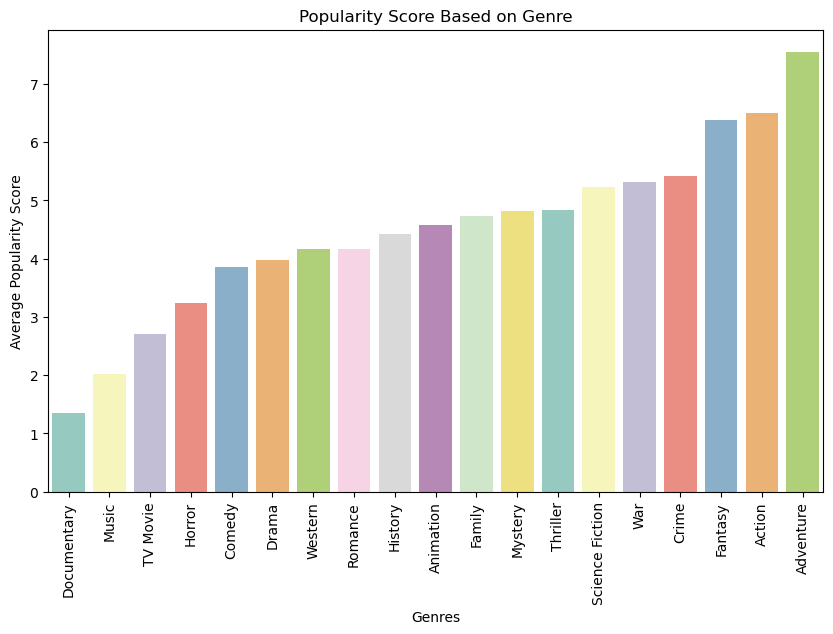

In [79]:

# Plot the bar graph with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_avg_pop, x='genre_ids', y='popularity', palette='Set3')
plt.xlabel('Genres')
plt.ylabel('Average Popularity Score')
plt.title('Popularity Score Based on Genre')
plt.xticks(rotation=90)
plt.show()

## Sales Bases on Appropriate Audience

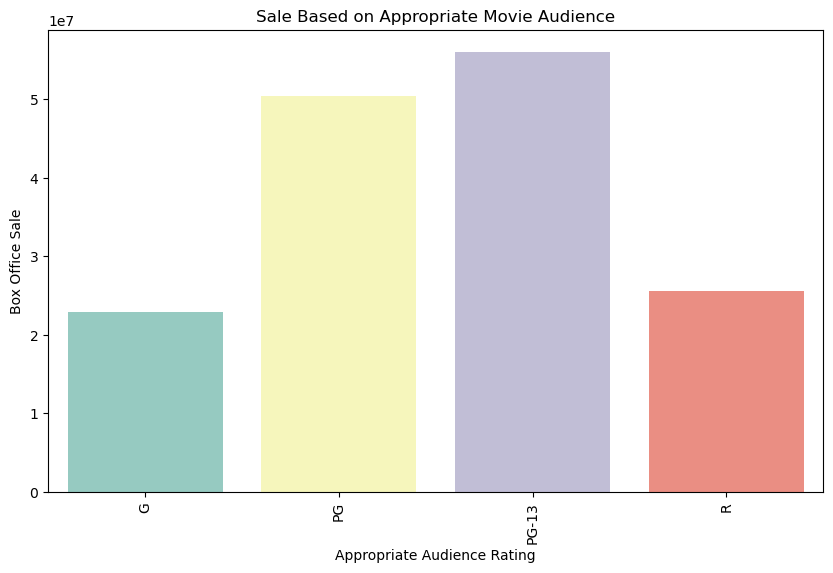

In [81]:
# Plot the bar graph with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_box_office_rating.index, y=avg_box_office_rating.values, palette='Set3')
plt.xlabel('Appropriate Audience Rating')
plt.ylabel('Box Office Sale')
plt.title('Sale Based on Appropriate Movie Audience')
plt.xticks(rotation=90)
plt.show()

## Sales Bases on Month throughout the Year

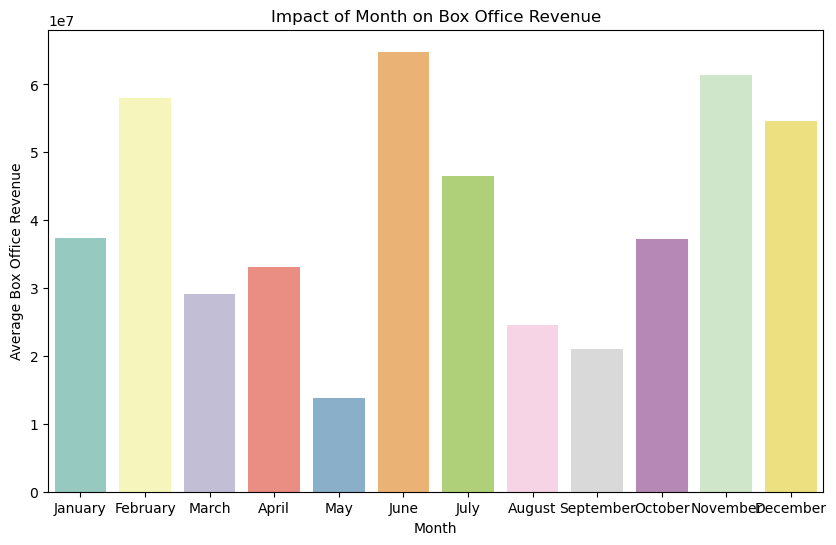

In [80]:
# Plot the average box office revenue by month
plt.figure(figsize=(10, 6))
sns.barplot(x=month_names, y=avg_box_office_month.values, palette='Set3')
plt.xlabel('Month')
plt.ylabel('Average Box Office Revenue')
plt.title('Impact of Month on Box Office Revenue')
plt.show()

## Conclusions

In [ ]:
# Your code here - remember to use markdown cells for comments as well!